In [101]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import time
import seaborn as sns

import analysis_utils as aute

In [98]:
class Parameters:
    path_to_cuest = "../Cuestionarios/"
    emot_states = ['Angry', 'Relax', 'Sad', 'Happy']

## Conversation duration

In [2]:
all_df_list = []
for file in os.listdir("../PostProcessedConversations/"):
    df_x = pd.read_csv("../PostProcessedConversations/" + file, sep=";")
    all_df_list.append(df_x)
    
print("Number of conversations:", len(all_df_list))

Number of conversations: 579


In [25]:
delta_time_list = []
for df in all_df_list:
    start_t = df["BotTalkStartUnix"].iloc[0]
    
    last_source = df["Source"].iloc[-1]
    end_t = df[last_source + "TalkEndUnix"].iloc[-1]

    delta_time_list.append(end_t - start_t)

Mean Conversation time (min) = 3.421 +/- 0.971 ; Median = 3.58 ; Min. =  0.649 ; Max. =  4.807


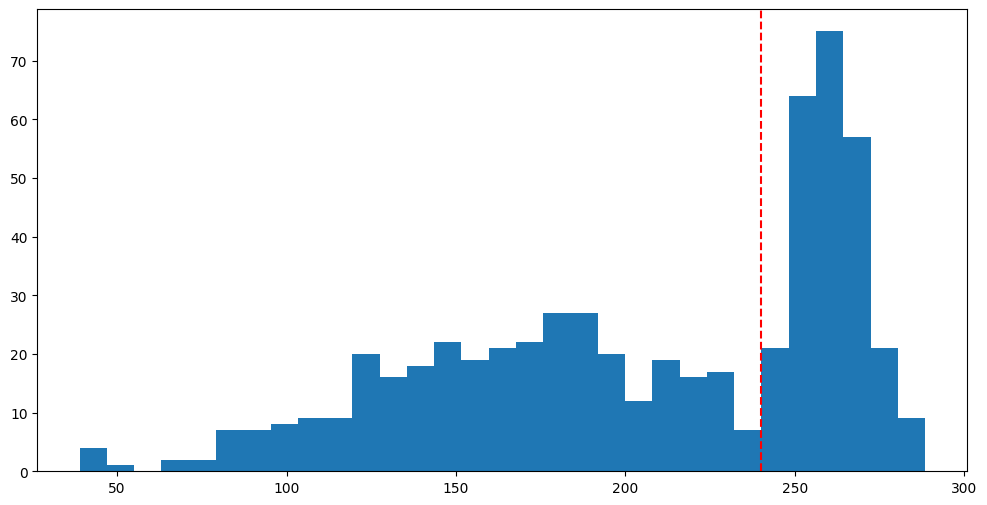

In [36]:
aute.stat_print(np.array(delta_time_list)/60, "Conversation time (min)", 3)

plt.figure(figsize=(12, 6))
plt.hist(delta_time_list, bins=31)
plt.axvline(4 * 60, linestyle="--", c="red")

plt.show()

## Did the emotion elicitation and identification vary among male and female participants or between male and female virtual humans?

### PHQ-9

To filter which subjects are NOT depressive.

In [37]:
df_phq9 = pd.read_excel("../Cuestionarios/CHATBOTs_PHQ-9.xlsx", skiprows=[1])
user_name_column = [user.replace("User", "USER") if isinstance(user, str) else np.nan for user in df_phq9["Usuario"].values]
df_phq9["SubjectId"] = user_name_column

cols_to_sum = [
    'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
    'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
    'Unnamed: 19'
]

dict_to_replace = {
    "Ningún dia": 0,
    "Varios días": 1,
    "Más de la mitad de los días": 2,
    "Casi todos los días": 3
}

for col in cols_to_sum:
    df_phq9[col] = df_phq9[col].replace(dict_to_replace)

df_phq9["TotalSum"] = np.nansum(df_phq9[cols_to_sum], axis=1)
phq9_th_depress = 10

all_users_no_depress = df_phq9[df_phq9["TotalSum"] < phq9_th_depress]["SubjectId"].values
subj_no_depress_list = [
    subj for subj in all_users_no_depress if isinstance(subj, str) and "CB" in subj and not "P" in subj
]
print("Num of subjects", len(subj_no_depress_list))

Num of subjects 64


### Demographics

In [84]:
df_demo = pd.read_csv(Parameters.path_to_cuest + "PostProcessedCuest/DemographicPostProc.csv", sep=";")
df_demo["GenderMale"] = ((df_demo["GenderFem"] == 0) * (df_demo["GenderOther"] == 0)) * 1
print("Demo shape without clean subjects", df_demo.shape)

idx_clean = []
for i_us, us in df_demo["SubjectId"].to_dict().items():
    if np.sum(np.array(subj_no_depress_list) == us) == 1:
        idx_clean.append(i_us)
    # else:
        # print(us)
# idx_clean = [i_us for i_us, us in enumerate(df_angry["Usuario"])]
df_demo = df_demo.loc[idx_clean]
print("Demo shape only NO depressive", df_demo.shape)

Demo shape without clean subjects (114, 49)
Demo shape only NO depressive (64, 49)


In [55]:
print("Number of females", np.sum(df_demo["GenderFem"] == 1))
print("Number of males", np.sum(df_demo["GenderMale"] == 1))

Number of females 32
Number of males 31


### Questionnaires

In [58]:
df_angry = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarAngry.csv")
idx_clean = []
for i_us, us in df_angry["SubjectId"].to_dict().items():
    if np.sum(np.array(subj_no_depress_list) == us) == 1:
        idx_clean.append(i_us)
    # else:
        # print(us)
# idx_clean = [i_us for i_us, us in enumerate(df_angry["Usuario"])]
df_angry = df_angry.loc[idx_clean]
df_angry["Personality"] = "Angry"

df_happy = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarHappy.csv")
idx_clean = []
for i_us, us in df_happy["SubjectId"].to_dict().items():
    if np.sum(np.array(subj_no_depress_list) == us) == 1:
        idx_clean.append(i_us)
# idx_clean = [i_us for i_us, us in enumerate(df_angry["Usuario"])]
df_happy = df_happy.loc[idx_clean]
df_happy["Personality"] = "Happy"

df_relax = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarRelax.csv")
idx_clean = []
for i_us, us in df_relax["SubjectId"].to_dict().items():
    if np.sum(np.array(subj_no_depress_list) == us) == 1:
        idx_clean.append(i_us)
# idx_clean = [i_us for i_us, us in enumerate(df_angry["Usuario"])]
df_relax = df_relax.loc[idx_clean]
df_relax["Personality"] = "Relax"

df_sad = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarSad.csv")
idx_clean = []
for i_us, us in df_sad["SubjectId"].to_dict().items():
    if np.sum(np.array(subj_no_depress_list) == us) == 1:
        idx_clean.append(i_us)
# idx_clean = [i_us for i_us, us in enumerate(df_angry["Usuario"])]
df_sad = df_sad.loc[idx_clean]
df_sad["Personality"] = "Sad"

df_neutral1 = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarN1.csv")
idx_clean = []
for i_us, us in df_neutral1["SubjectId"].to_dict().items():
    if np.sum(np.array(subj_no_depress_list) == us) == 1:
        idx_clean.append(i_us)
# idx_clean = [i_us for i_us, us in enumerate(df_angry["Usuario"])]
df_neutral1 = df_neutral1.loc[idx_clean]
df_neutral1["Personality"] = "Neutral1"

df_neutral2 = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarN2.csv")
idx_clean = []
for i_us, us in df_neutral2["SubjectId"].to_dict().items():
    if np.sum(np.array(subj_no_depress_list) == us) == 1:
        idx_clean.append(i_us)
# idx_clean = [i_us for i_us, us in enumerate(df_angry["Usuario"])]
df_neutral2 = df_neutral2.loc[idx_clean]
df_neutral2["Personality"] = "Neutral2"

df_all_cuest = pd.concat([df_angry, df_happy, df_relax, df_sad, df_neutral1, df_neutral2]).reset_index(drop=True)
print("Shape of all quest.", df_all_cuest.shape)

Shape of all quest. (379, 35)


### To check VH gender

In [77]:
time_evol_nr_list = []
for subj in subj_no_depress_list:
    
    path_to_got = "../Conversations/" + subj + "_Conversations/GuideOfTimes.csv"
    
    try:
        df_got = pd.read_csv(path_to_got, sep=";")
    except:
        print("Bad subject", path_to_got)
        continue
    
    for i in range(0, df_got.shape[0], 2):

        event = df_got["Event"].iloc[i]
        if "_" not in event:
            continue

        emotion, gender, vh_form, _ = event.split("_")
        
        time_evol_nr_list.append({
            "Subject": subj,
            "VHEmotion": emotion,
            "VHGender": gender,
            "VHForm": vh_form
        })

df_order_vh_info = pd.DataFrame(time_evol_nr_list)
display(df_order_vh_info.head(10))

print("Shape of the data", df_order_vh_info.shape)

Bad subject ../Conversations/USER_48_CB2_Conversations/GuideOfTimes.csv
Bad subject ../Conversations/USER_47_CB2_Conversations/GuideOfTimes.csv


,Subject,VHEmotion,VHGender,VHForm
0,USER_45_CB2,Neutral,Female,1
1,USER_45_CB2,Neutral,Male,2
2,USER_45_CB2,Happy,Woman,1
3,USER_45_CB2,Relax,Man,2
4,USER_45_CB2,Sad,Woman,2
5,USER_45_CB2,Angry,Man,1
6,USER_43_CB2,Neutral,Female,1
7,USER_43_CB2,Neutral,Male,2
8,USER_43_CB2,Angry,Woman,2
9,USER_43_CB2,Sad,Man,2


Shape of the data (377, 4)


In [87]:
df_demo

,Unnamed: 0,respondent_id,collector_id,date_created,date_modified,ip_address,email_address,first_name,last_name,custom_1,...,Unnamed: 38,AgeYears,GenderFem,GenderOther,NumHPlayVGame,PlayVGame,OrdinalPs,NoMedicine,SubjectId,GenderMale
2,2,118253913984,448136109,2023-02-27 11:04:52,2023-02-27 11:10:44,158.42.142.216,NaN,NaN,NaN,NaN,...,NaN,21.47,0,0,1.0,1,0,1,USER_48_CB2,1
3,3,118253843725,448136109,2023-02-27 08:58:26,2023-02-27 09:05:29,158.42.142.216,NaN,NaN,NaN,NaN,...,NaN,19.12,0,0,2.0,1,1,1,USER_47_CB2,1
5,5,118251986379,448136109,2023-02-24 11:21:14,2023-02-24 11:29:56,158.42.142.216,NaN,NaN,NaN,NaN,...,NaN,33.89,0,0,1.0,1,0,1,USER_45_CB2,1
7,7,118251074759,448136109,2023-02-23 12:59:47,2023-02-23 13:02:21,158.42.142.216,NaN,NaN,NaN,NaN,...,NaN,42.29,0,0,NaN,0,3,1,USER_43_CB2,1
8,8,118251011923,448136109,2023-02-23 08:30:37,2023-02-23 11:08:35,158.42.142.216,NaN,NaN,NaN,NaN,...,NaN,55.35,0,0,1.0,1,0,1,USER_42_CB2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,97,118179941600,448136109,2022-11-18 08:29:38,2022-11-18 08:53:54,158.42.69.160,NaN,NaN,NaN,NaN,...,NaN,47.12,1,0,NaN,0,0,1,USER_07_CB,0
99,99,118178971670,448136109,2022-11-17 10:48:41,2022-11-17 11:11:37,158.42.69.160,NaN,NaN,NaN,NaN,...,NaN,32.51,0,0,NaN,0,1,1,USER_05_CB,1
101,101,118177952679,448136109,2022-11-16 13:01:38,2022-11-16 13:06:57,158.42.69.160,NaN,NaN,NaN,NaN,...,NaN,21.01,1,0,NaN,0,0,1,USER_03_CB,0
102,102,118177863391,448136109,2022-11-16 10:35:03,2022-11-16 10:46:56,158.42.69.160,NaN,NaN,NaN,NaN,...,NaN,43.17,1,0,NaN,0,0,1,USER_02_CB,0


In [88]:
df_merge = df_all_cuest.merge(df_order_vh_info, left_on=["SubjectId", "Personality"], right_on=["Subject", "VHEmotion"])
demo_cols_list = ['AgeYears', 'GenderFem', 'GenderOther', 'NumHPlayVGame', 'PlayVGame', 'OrdinalPs', 'NoMedicine', 'SubjectId', 'GenderMale']
df_merge = df_merge.merge(df_demo[demo_cols_list], left_on="SubjectId", right_on="SubjectId")

In [91]:
df_vh_man = df_merge[df_merge["VHGender"] == "Man"].reset_index(drop=True)
print("VH MAN", df_vh_man.shape)

df_vh_woman = df_merge[df_merge["VHGender"] == "Woman"].reset_index(drop=True)
print("VH WOMAN", df_vh_woman.shape)

VH MAN (124, 47)
VH WOMAN (124, 47)


Emotion Angry
Emotion elicitation (Question3 -> Valencia; Question4 -> Arousal)


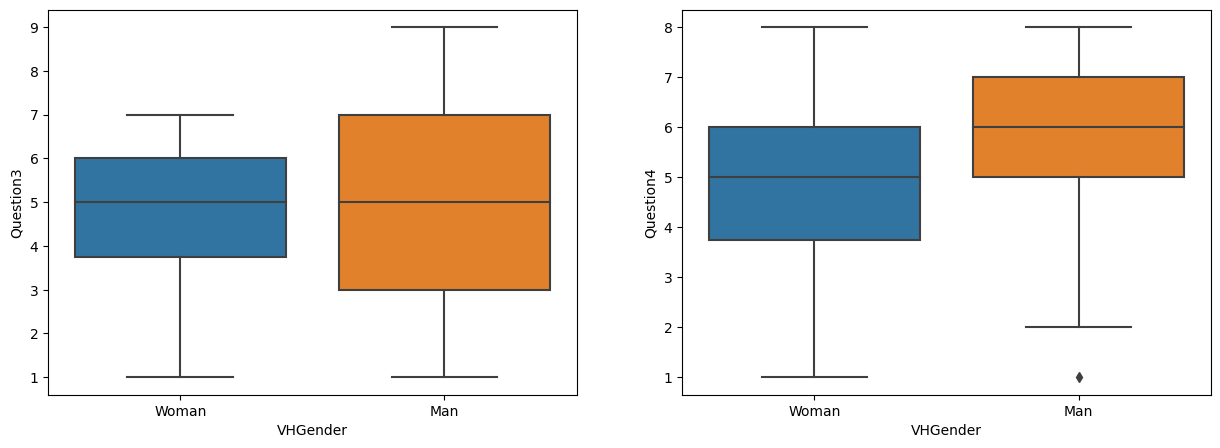

Emotion recognition (Question6 -> Valencia; Question7 -> Arousal)


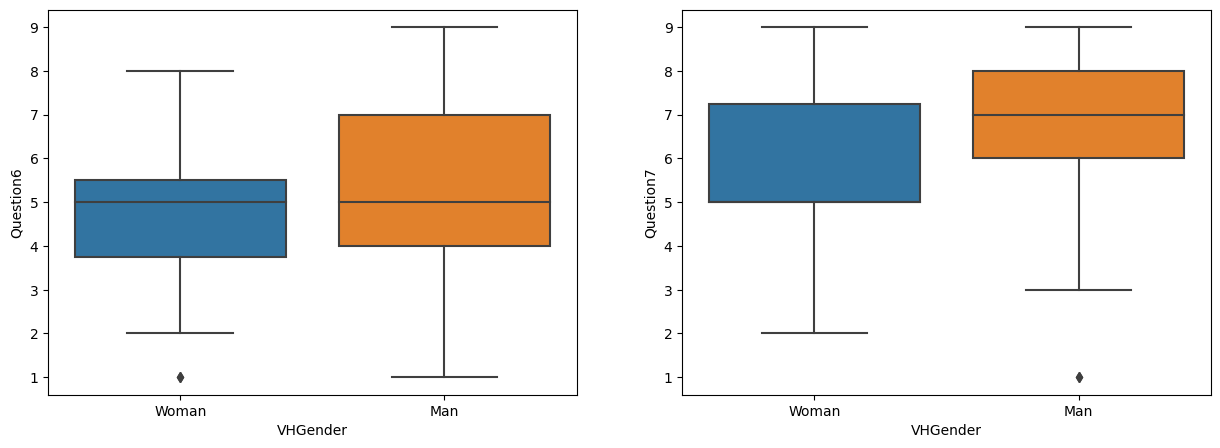


Emotion Relax
Emotion elicitation (Question3 -> Valencia; Question4 -> Arousal)


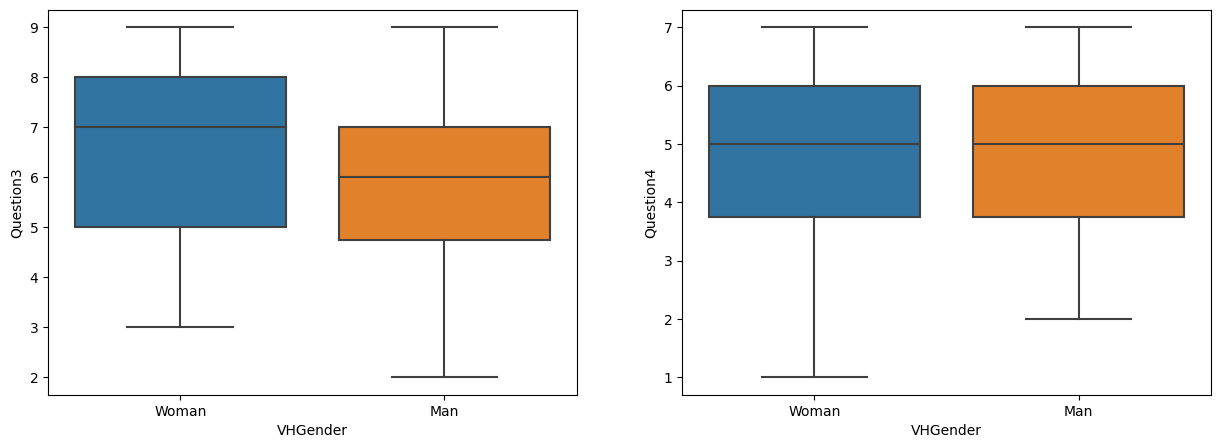

Emotion recognition (Question6 -> Valencia; Question7 -> Arousal)


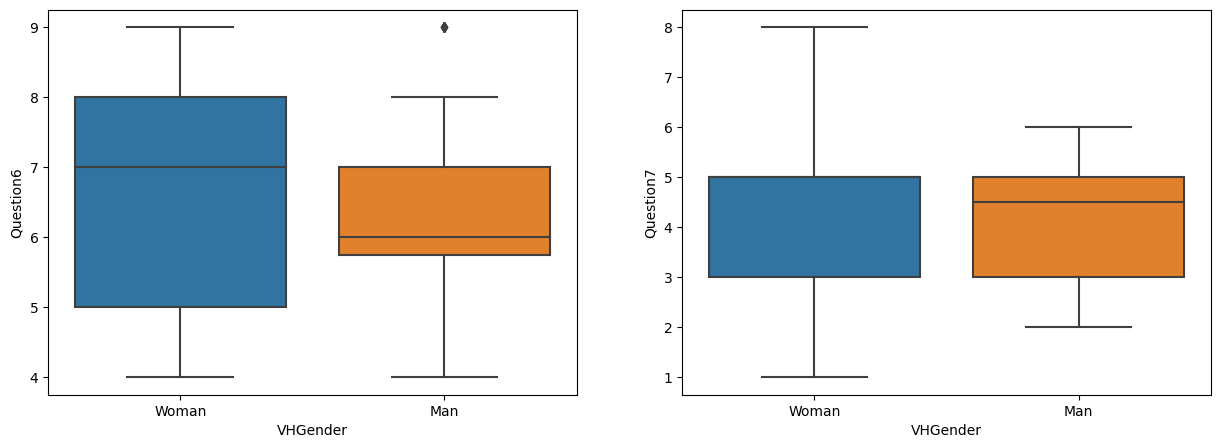


Emotion Sad
Emotion elicitation (Question3 -> Valencia; Question4 -> Arousal)


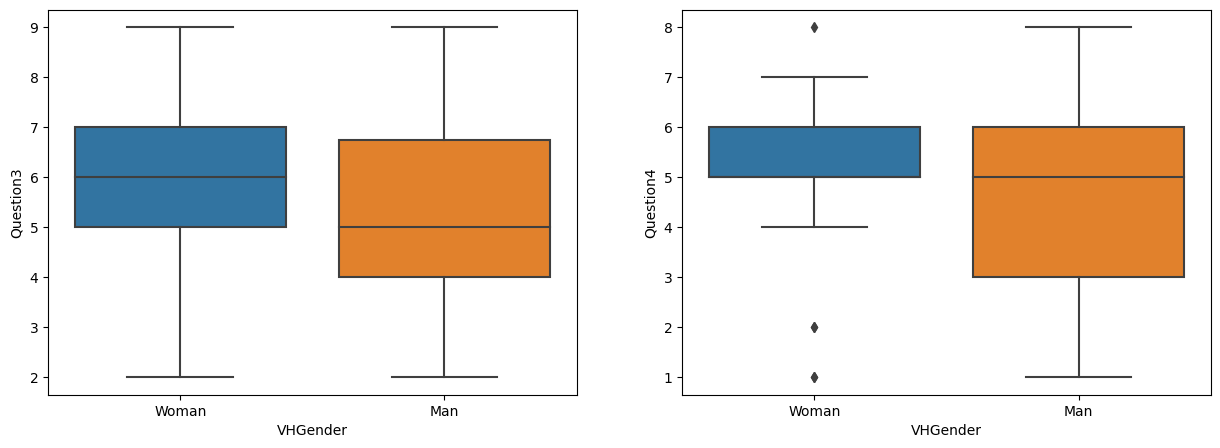

Emotion recognition (Question6 -> Valencia; Question7 -> Arousal)


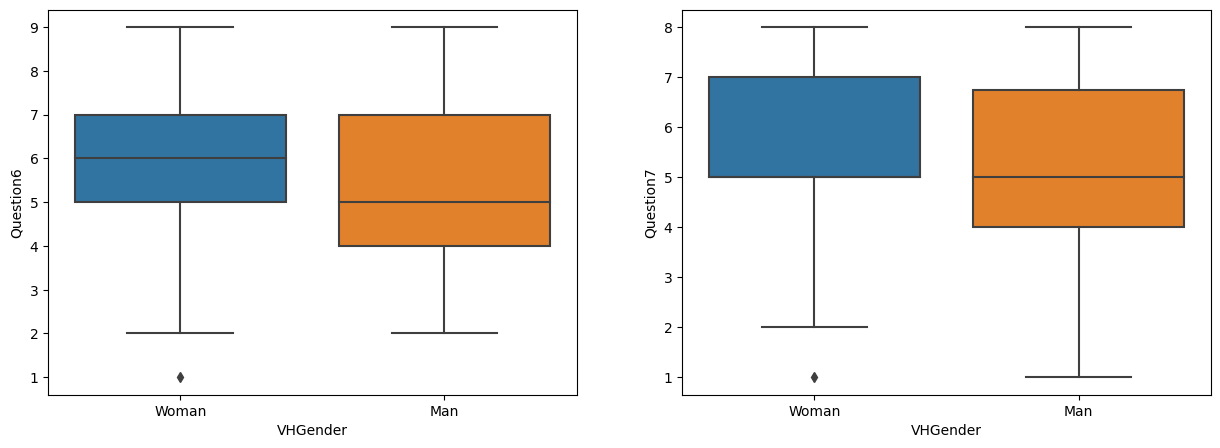


Emotion Happy
Emotion elicitation (Question3 -> Valencia; Question4 -> Arousal)


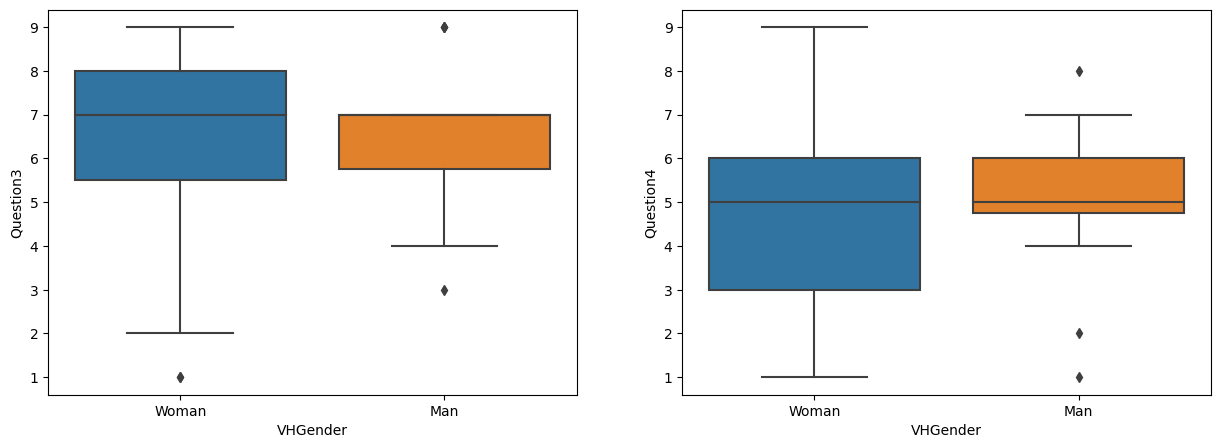

Emotion recognition (Question6 -> Valencia; Question7 -> Arousal)


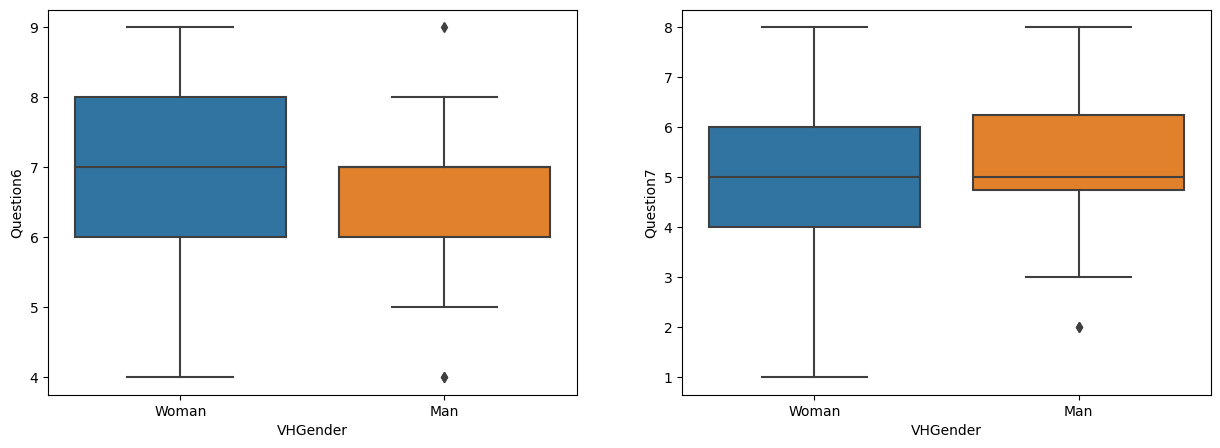

In [133]:
vh_gender_stat_diff_list = []
for emot in Parameters.emot_states:
    df_vh_man_emot = df_vh_man[df_vh_man["Personality"] == emot]
    df_vh_woman_emot = df_vh_woman[df_vh_woman["Personality"] == emot]

    for q in ["3", "4", "6", "7"]:
        _, kruskal_p_value = sp.stats.kruskal(df_vh_man_emot["Question" + q].dropna().values, df_vh_woman_emot["Question" + q].dropna().values)
        label = "Emotion elicitation" if q == "3" or q == "4" else "Emotion recognition"
        vh_gender_stat_diff_list.append({
            "Emotion": emot,
            "Question": int(q),
            "Label": label,
            "Kruskal_pvalue_Test": kruskal_p_value,
            "NumSamplesVHMan": df_vh_man_emot.shape[0],
            "NumSamplesVHWoman": df_vh_woman_emot.shape[0]
        })
    
    df_both = pd.concat([df_vh_woman_emot, df_vh_man_emot]).reset_index(drop=True)

    print("Emotion", emot)
    print("Emotion elicitation (Question3 -> Valencia; Question4 -> Arousal)")
    fig = plt.figure(figsize=(15, 5))
    fig.add_subplot(1,2,1)
    sns.boxplot(data=df_both, y="Question3", x="VHGender")
    fig.add_subplot(1,2,2)
    sns.boxplot(data=df_both, y="Question4", x="VHGender")
    plt.show()

    print("Emotion recognition (Question6 -> Valencia; Question7 -> Arousal)")
    fig = plt.figure(figsize=(15, 5))
    fig.add_subplot(1,2,1)
    sns.boxplot(data=df_both, y="Question6", x="VHGender")
    fig.add_subplot(1,2,2)
    sns.boxplot(data=df_both, y="Question7", x="VHGender")
    plt.show()
    print()

df_vh_g_stat = pd.DataFrame(vh_gender_stat_diff_list)

In [134]:
display(df_vh_g_stat)

print("Amount of samples which have statistical difference in "
      "arousal or valence in emotion recognition or elicitation for VH gender = ", 
      np.sum(df_vh_g_stat["Kruskal_pvalue_Test"] < 0.05))

,Emotion,Question,Label,Kruskal_pvalue_Test,NumSamplesVHMan,NumSamplesVHWoman
0,Angry,3,Emotion elicitation,0.887834,45,16
1,Angry,4,Emotion elicitation,0.130483,45,16
2,Angry,6,Emotion recognition,0.610912,45,16
3,Angry,7,Emotion recognition,0.121959,45,16
4,Relax,3,Emotion elicitation,0.370442,25,36
5,Relax,4,Emotion elicitation,0.937962,25,36
6,Relax,6,Emotion recognition,0.883887,25,36
7,Relax,7,Emotion recognition,0.418104,25,36
8,Sad,3,Emotion elicitation,0.245998,38,25
9,Sad,4,Emotion elicitation,0.760372,38,25


Amount of samples which have statistical difference inarousal or valence in emotion recognition or elicitation for VH gender =  0


In [94]:
df_pers_man = df_merge[df_merge["GenderFem"] == 1].reset_index(drop=True)
print("PERSON MAN", df_pers_man.shape)

df_pers_woman = df_merge[df_merge["GenderMale"] == 1].reset_index(drop=True)
print("PERSON WOMAN", df_pers_woman.shape)

PERSON MAN (127, 47)
PERSON WOMAN (117, 47)


Emotion Angry
Emotion elicitation (Question3 -> Valencia; Question4 -> Arousal)


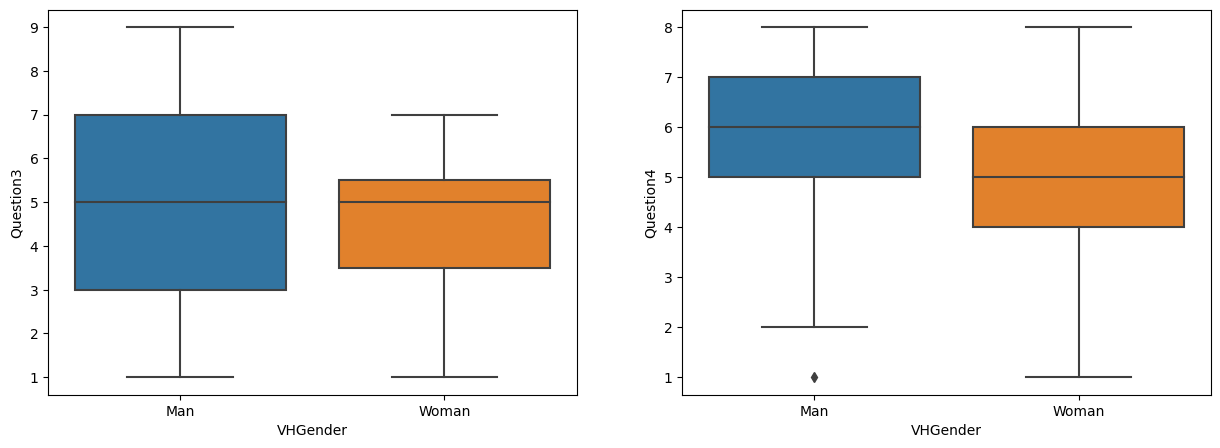

Emotion recognition (Question6 -> Valencia; Question7 -> Arousal)


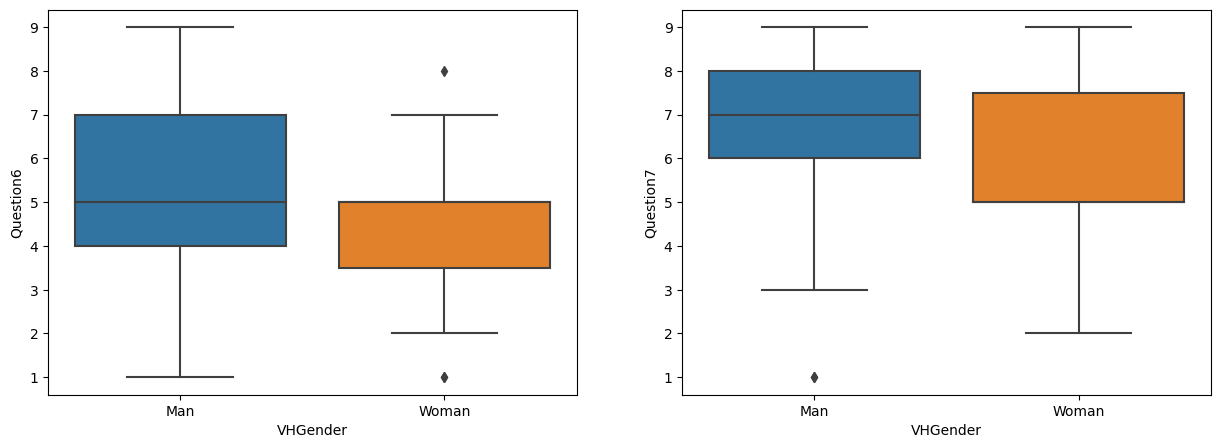


Emotion Relax
Emotion elicitation (Question3 -> Valencia; Question4 -> Arousal)


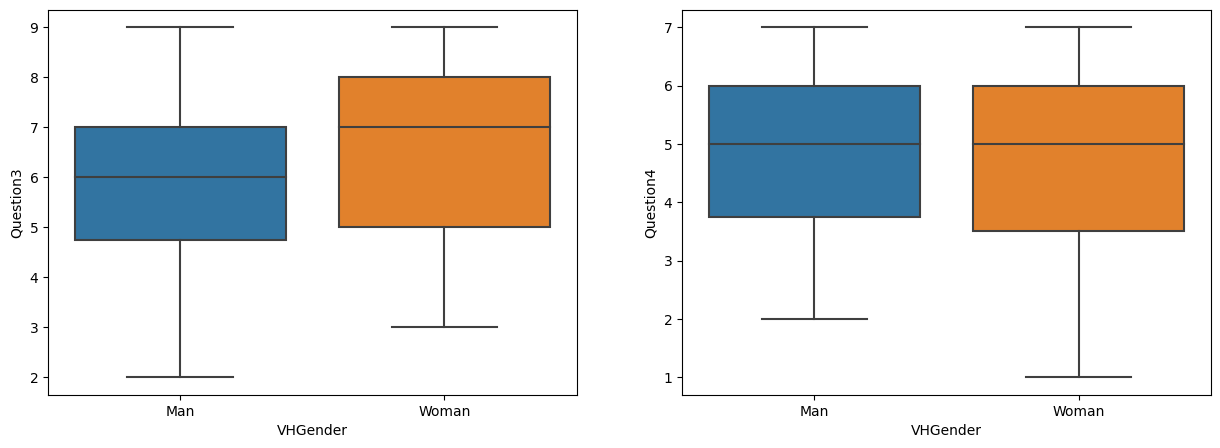

Emotion recognition (Question6 -> Valencia; Question7 -> Arousal)


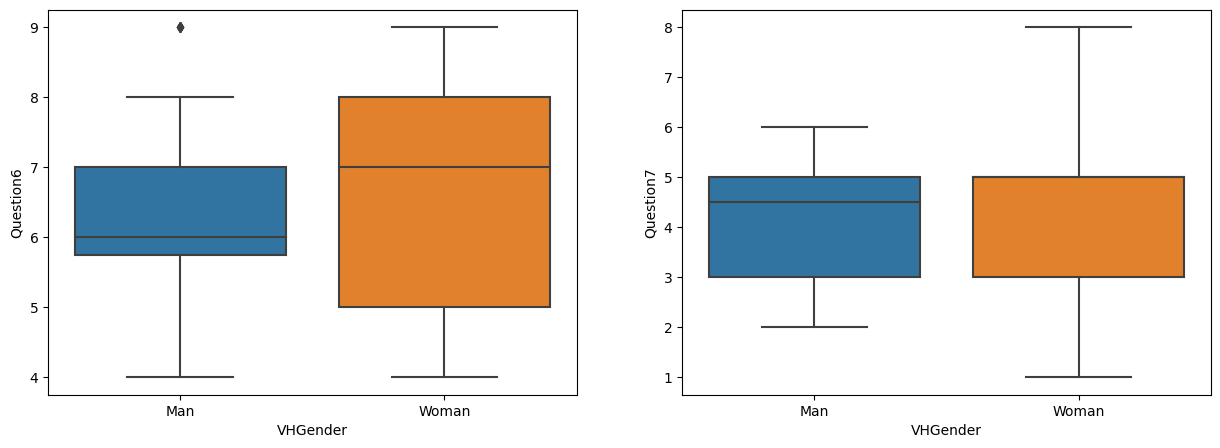


Emotion Sad
Emotion elicitation (Question3 -> Valencia; Question4 -> Arousal)


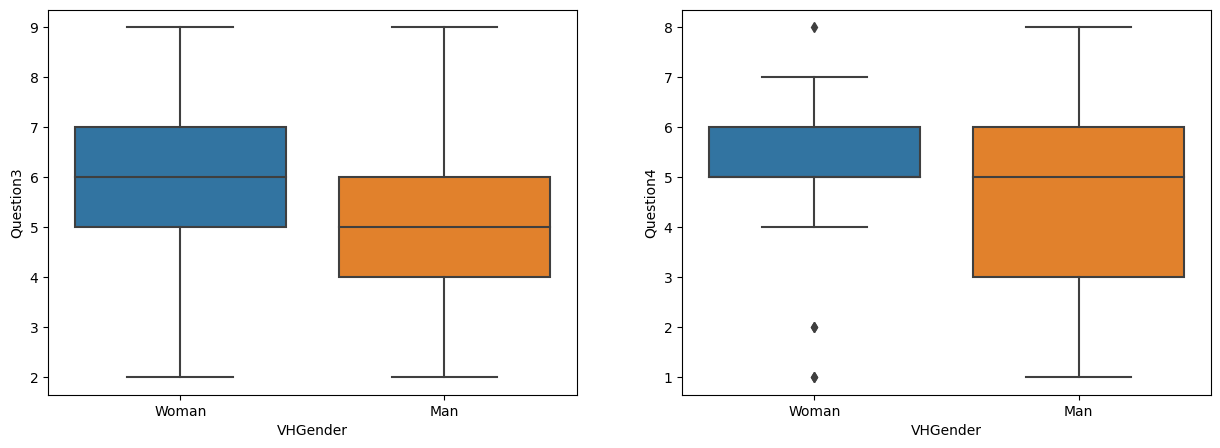

Emotion recognition (Question6 -> Valencia; Question7 -> Arousal)


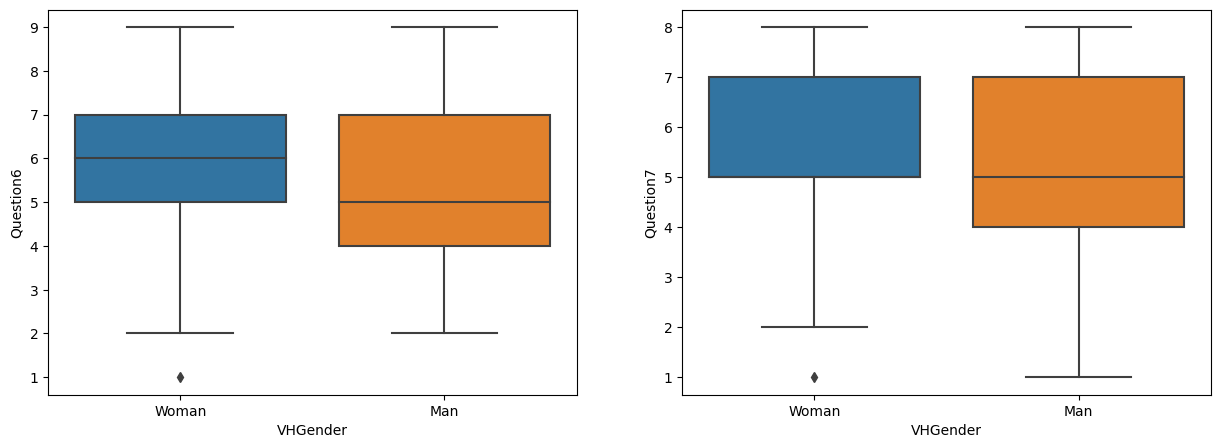


Emotion Happy
Emotion elicitation (Question3 -> Valencia; Question4 -> Arousal)


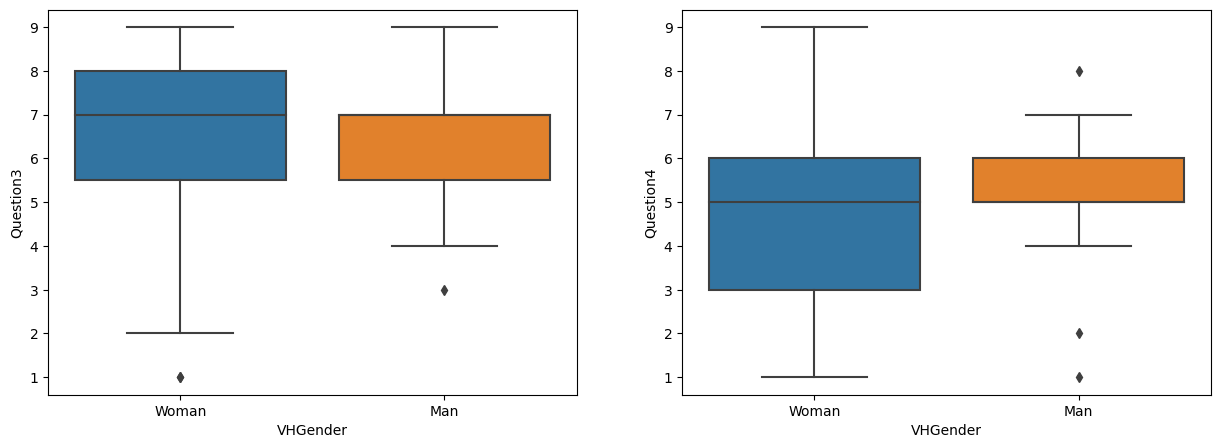

Emotion recognition (Question6 -> Valencia; Question7 -> Arousal)


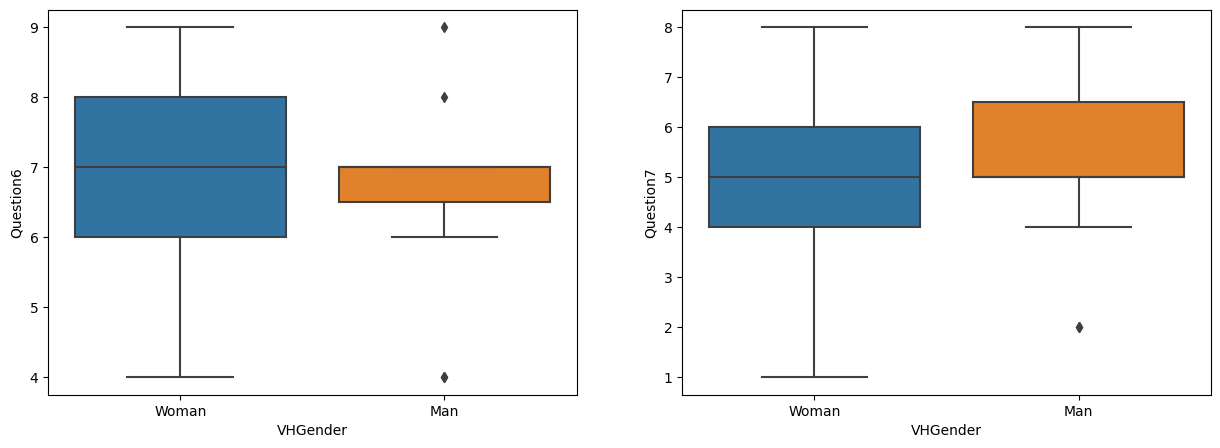

In [131]:
pers_gender_stat_diff_list = []
for emot in Parameters.emot_states:
    df_pers_man_emot = df_pers_man[df_pers_man["Personality"] == emot]
    df_pers_woman_emot = df_pers_woman[df_pers_woman["Personality"] == emot]

    for q in ["3", "4", "6", "7"]:
        _, kruskal_p_value = sp.stats.kruskal(df_pers_man_emot["Question" + q].dropna().values, df_pers_woman_emot["Question" + q].dropna().values)
        label = "Emotion elicitation" if q == "3" or q == "4" else "Emotion recognition"
        pers_gender_stat_diff_list.append({
            "Emotion": emot,
            "Question": int(q),
            "Label": label,
            "Kruskal_pvalue_Test": kruskal_p_value,
            "NumSamplesPersMan": df_pers_man_emot.shape[0],
            "NumSamplesPersWoman": df_pers_woman_emot.shape[0]
        })
    
    df_both = pd.concat([df_pers_woman_emot, df_pers_man_emot]).reset_index(drop=True)

    print("Emotion", emot)
    print("Emotion elicitation (Question3 -> Valencia; Question4 -> Arousal)")
    fig = plt.figure(figsize=(15, 5))
    fig.add_subplot(1,2,1)
    sns.boxplot(data=df_both, y="Question3", x="VHGender")
    fig.add_subplot(1,2,2)
    sns.boxplot(data=df_both, y="Question4", x="VHGender")
    plt.show()

    print("Emotion recognition (Question6 -> Valencia; Question7 -> Arousal)")
    fig = plt.figure(figsize=(15, 5))
    fig.add_subplot(1,2,1)
    sns.boxplot(data=df_both, y="Question6", x="VHGender")
    fig.add_subplot(1,2,2)
    sns.boxplot(data=df_both, y="Question7", x="VHGender")
    plt.show()
    print()

df_pers_g_stat = pd.DataFrame(pers_gender_stat_diff_list)

In [132]:
display(df_pers_g_stat)

print("Amount of samples which have statistical difference in "
      "arousal or valence in emotion recognition or elicitation for Person gender = ", 
      np.sum(df_pers_g_stat["Kruskal_pvalue_Test"] < 0.05))

,Emotion,Question,Label,Kruskal_pvalue_Test,NumSamplesPersMan,NumSamplesPersWoman
0,Angry,3,Emotion elicitation,0.140215,31,29
1,Angry,4,Emotion elicitation,0.797537,31,29
2,Angry,6,Emotion recognition,0.740505,31,29
3,Angry,7,Emotion recognition,0.752745,31,29
4,Relax,3,Emotion elicitation,0.758518,31,29
5,Relax,4,Emotion elicitation,0.155428,31,29
6,Relax,6,Emotion recognition,0.816689,31,29
7,Relax,7,Emotion recognition,0.924339,31,29
8,Sad,3,Emotion elicitation,0.897639,33,29
9,Sad,4,Emotion elicitation,0.237331,33,29


Amount of samples which have statistical difference inarousal or valence in emotion recognition or elicitation for Person gender =  0
